# Analysis of COVID-19 Cases in the world

Some requirements:

- ~~Convert data into tidy format~~
- ~~Export to normalized tables in SQLite3 Database~~
- Use SQL statements (from within pandas) to retrieve data needed for each visualization

### Visualization 1: 
#### Does average temperature per year affect how fast COVID spreads (based on number of cases)?

Step 1) Create a DF that only has Country, Date, Average Temp per year, Number of cases  
Step 2) Create time-series graph  
Step 3) Compare how many days it takes to hit its median number of cases

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sqlite3 import Error
from datetime import datetime

In [7]:
# Connecting database using SQLite3

conn = sqlite3.connect("../database/data.db")
cur = conn.cursor()

In [8]:
df = pd.read_sql_query("SELECT * FROM covidstats", conn)
df

,Country,Continent,Date,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
0,Albania,Europe,2020-02-25,14,2.89,1.29,5353.2,2873457,38,14,8.0,0.0,0.0
1,Albania,Europe,2020-02-26,14,2.89,1.29,5353.2,2873457,38,14,5.0,0.0,0.0
2,Albania,Europe,2020-02-27,14,2.89,1.29,5353.2,2873457,38,14,4.0,0.0,0.0
3,Albania,Europe,2020-02-28,14,2.89,1.29,5353.2,2873457,38,14,1.0,0.0,0.0
4,Albania,Europe,2020-02-29,14,2.89,1.29,5353.2,2873457,38,14,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,2021-02-24,20,1.70,0.08,1464.0,16529904,19,3,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,2021-02-25,20,1.70,0.08,1464.0,16529904,19,3,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,2021-02-26,20,1.70,0.08,1464.0,16529904,19,3,0.0,36044.0,1463.0
38470,Zimbabwe,Africa,2021-02-27,20,1.70,0.08,1464.0,16529904,19,3,0.0,36058.0,1463.0


In [17]:
smalltable_create = '''CREATE TABLE SMALLTABLE AS SELECT COUNTRY, DATE, SUM(CASES) / 2 AS Median, `AVERAGE TEMPERATURE PER YEAR` FROM covidstats GROUP BY COUNTRY'''
smalltable_read = '''SELECT * FROM SMALLTABLE'''

cur.execute(smalltable_create)
smalltable = pd.read_sql_query(smalltable_read, conn)
smalltable

,Country,Date,Median,Average temperature per year
0,Albania,2020-02-25,4.213241e+06,14
1,Algeria,2020-02-25,8.446178e+06,25
2,Argentina,2020-01-01,1.301914e+08,14
3,Armenia,2020-03-01,1.218515e+07,11
4,Australia,2020-01-26,3.394713e+06,22
...,...,...,...,...
99,United States,2020-01-22,1.614248e+09,11
100,Uruguay,2020-03-13,1.553082e+06,16
101,Vietnam,2020-01-23,1.646040e+05,25
102,Zambia,2020-03-18,2.734962e+06,21


In [18]:
visualization_1_create = '''CREATE TABLE VISUAL_1 AS SELECT COUNTRY, DATE, `AVERAGE TEMPERATURE PER YEAR`, CASES FROM covidstats'''
visualization_1_read = '''SELECT * FROM VISUAL_1'''

cur.execute(visualization_1_create)
visualization_1 = pd.read_sql_query(visualization_1_read, conn)
visualization_1

,Country,Date,Average temperature per year,Cases
0,Albania,2020-02-25,14,0.0
1,Albania,2020-02-26,14,0.0
2,Albania,2020-02-27,14,0.0
3,Albania,2020-02-28,14,0.0
4,Albania,2020-02-29,14,0.0
...,...,...,...,...
38467,Zimbabwe,2021-02-24,20,35960.0
38468,Zimbabwe,2021-02-25,20,35994.0
38469,Zimbabwe,2021-02-26,20,36044.0
38470,Zimbabwe,2021-02-27,20,36058.0


In [20]:
# Combine both tables together so that the median can be seen in visualization_1 dataframe

combined_df_1_sql = '''SELECT SMALLTABLE.COUNTRY, VISUAL_1.DATE, SMALLTABLE.`AVERAGE TEMPERATURE PER YEAR`, VISUAL_1.CASES, Median FROM VISUAL_1 INNER JOIN SMALLTABLE ON VISUAL_1.Country = SMALLTABLE.Country'''
visualization_1_combined = pd.read_sql_query(combined_df_1_sql, conn)
visualization_1_combined

,Country,Date,Average temperature per year,Cases,Median
0,Albania,2020-02-25,14,0.0,4213241.0
1,Albania,2020-02-26,14,0.0,4213241.0
2,Albania,2020-02-27,14,0.0,4213241.0
3,Albania,2020-02-28,14,0.0,4213241.0
4,Albania,2020-02-29,14,0.0,4213241.0
...,...,...,...,...,...
38467,Zimbabwe,2021-02-24,20,35960.0,1553874.0
38468,Zimbabwe,2021-02-25,20,35994.0,1553874.0
38469,Zimbabwe,2021-02-26,20,36044.0,1553874.0
38470,Zimbabwe,2021-02-27,20,36058.0,1553874.0


In [21]:
# Calculate the number of days that it takes for each country to pass its median
# Find the earliest date that total cases > median for that country
## Once earliest date is found, makes a flag True so that it doesnt get replaced by other future dates

# total_cases = []
previous_country = visualization_1_combined['Country'][0]
previous_total = 0
country_start_date = visualization_1_combined['Date'][0]
num_rows, num_cols = visualization_1_combined.shape
date_found = False
num_days = {}

for row in range(num_rows):
    current_country = visualization_1_combined['Country'][row]
    # print(current_country)
    if current_country != previous_country: # Different country
        # print(current_country)

        # Resetting values
        country_start_date = visualization_1_combined['Date'][row]
        previous_country = current_country
        previous_total = 0
        date_found = False
        country_start_date
    if date_found: # Date has been found
        continue


    current_cases = int(visualization_1_combined['Cases'][row])
    # total_cases.append(current_cases + previous_total)
    current_total = current_cases + previous_total
    # print(current_total)
    if current_total >= int(visualization_1_combined['Median'][row]):
        date_found = True
        first_date_past_median = visualization_1_combined['Date'][row]
        start_date = datetime.strptime(country_start_date, '%Y-%m-%d').date()
        end_date = datetime.strptime(first_date_past_median, '%Y-%m-%d').date()
        # print((end_date - start_date).days)
        diff_days = (end_date - start_date).days
        num_days[current_country] = diff_days
        
    else:
        previous_total = current_total
        

# visualization_1_combined.insert(loc=num_cols, column="Total Cases so far", value = total_cases, allow_duplicates=False)
visualization_1_combined

,Country,Date,Average temperature per year,Cases,Median
0,Albania,2020-02-25,14,0.0,4213241.0
1,Albania,2020-02-26,14,0.0,4213241.0
2,Albania,2020-02-27,14,0.0,4213241.0
3,Albania,2020-02-28,14,0.0,4213241.0
4,Albania,2020-02-29,14,0.0,4213241.0
...,...,...,...,...,...
38467,Zimbabwe,2021-02-24,20,35960.0,1553874.0
38468,Zimbabwe,2021-02-25,20,35994.0,1553874.0
38469,Zimbabwe,2021-02-26,20,36044.0,1553874.0
38470,Zimbabwe,2021-02-27,20,36058.0,1553874.0


In [22]:
num_days

{'Albania': 319,
 'Algeria': 288,
 'Argentina': 354,
 'Armenia': 290,
 'Australia': 280,
 'Austria': 313,
 'Bahrain': 274,
 'Bangladesh': 265,
 'Belarus': 291,
 'Belgium': 322,
 'Bhutan': 297,
 'Bolivia': 261,
 'Bosnia and Herzegovina': 298,
 'Bulgaria': 303,
 'Canada': 338,
 'Cape Verde': 269,
 'Chile': 268,
 'Colombia': 289,
 'Costa Rica': 291,
 'Croatia': 319,
 'Cuba': 310,
 'Cyprus': 312,
 'Denmark': 340,
 'Dominican Republic': 278,
 'Ecuador': 272,
 'El Salvador': 262,
 'Estonia': 328,
 'Ethiopia': 274,
 'Fiji': 274,
 'Finland': 330,
 'France': 339,
 'Ghana': 247,
 'Greece': 315,
 'Guatemala': 291,
 'Hungary': 312,
 'Iceland': 267,
 'India': 314,
 'Indonesia': 306,
 'Iran': 302,
 'Iraq': 288,
 'Ireland': 308,
 'Israel': 310,
 'Italy': 335,
 'Jamaica': 289,
 'Japan': 351,
 'Jordan': 313,
 'Kazakhstan': 262,
 'Kenya': 278,
 'Kuwait': 274,
 'Latvia': 329,
 'Libya': 299,
 'Lithuania': 324,
 'Luxembourg': 306,
 'Madagascar': 240,
 'Malawi': 291,
 'Malaysia': 363,
 'Malta': 315,
 'Mauri

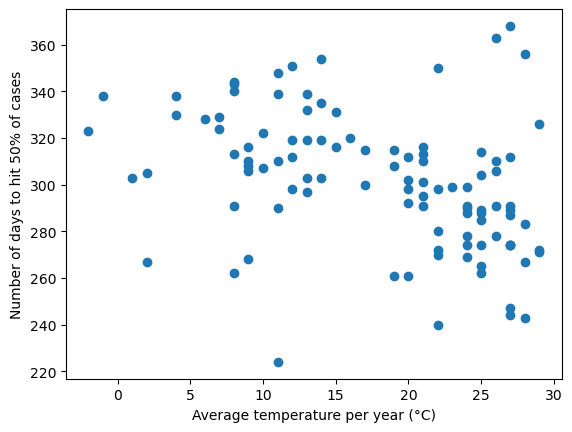

In [23]:
# Plot scatter graph (X-axis: Average temperature per year,
# Y-axis: Number of days it takes for number of cases to hit median)

x = list(smalltable['Average temperature per year'])
y = list(num_days.values())
plt.xlabel("Average temperature per year (°C)")
plt.ylabel("Number of days to hit 50% of cases")
plt.scatter(x, y)

### Conclusion:

- Number of days to hit 50% of cases in a country was used as the metric to see how fast the disease spreaded in a country. This was plotted against the average temperature of the country.

- While there is no significant correlation between these two factors, it can be seen that there are two spots that many points seem to gather around, which is between the 8C to 15C range, and the 21C to 27C range.

- For the countries that have an average temperature between 8C and 15C, it usually takes about 320 days to reach 50% of its total cases. 

- For the countries that have an average temperature between 21C and 27C, it usually takes around 280 days to reach 50%.